# Problem statement
Predict the burned area of the forest using Neural networks

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow

In [78]:
forest =pd.read_csv("forestfires.csv")

In [79]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [80]:
forest.shape

(517, 31)

In [81]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [82]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<b>We could see there are no null values</b>

In [83]:
forest.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

<b>We can see month,day and size_category are categorical columns, and rest are continuous.</b>

In [84]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

(array([378.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

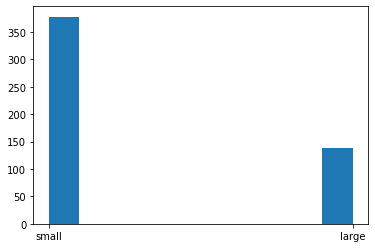

In [85]:
plt.hist(forest['size_category'])

In [86]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


here are 8 duplicate rows, we will delete the duplicate rows.

In [87]:
forest = forest.drop_duplicates()

In [88]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


We will drop the month and day columns from the dataframe as it already encoded with dummy encoding and converted to 0 and 1

In [89]:
forest = forest.drop(['month','day'],axis=1)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [90]:
forest['size_category']=pd.get_dummies(forest['size_category'])

In [91]:
forest['size_category'].value_counts()

0    371
1    138
Name: size_category, dtype: int64

In [92]:
X = forest.drop(["size_category"], axis = 1)
           
Y = forest['size_category']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 30)

In [93]:


# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [94]:
X_train_norm

array([[0.8126615 , 0.19159201, 0.77093856, ..., 0.        , 0.        ,
        0.        ],
       [0.57881137, 0.24017919, 0.77058616, ..., 0.        , 0.        ,
        0.        ],
       [0.86692506, 0.16264645, 0.35721837, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.92894057, 0.92591316, 0.9419711 , ..., 0.        , 0.        ,
        0.        ],
       [0.94186047, 0.85217092, 0.87454481, ..., 0.        , 0.        ,
        0.        ],
       [0.92635659, 0.30461751, 0.33067074, ..., 0.        , 0.        ,
        0.        ]])

In [95]:
X_train_norm.shape,X_test_norm.shape,Y_train.shape,Y_test.shape

((356, 28), (153, 28), (356,), (153,))

## Using Neural network for prediction

In [96]:
X_train_norm.shape[1]

28

In [97]:
optmizer =RMSprop(0.01)#0.01 is a learning rate
model =keras.Sequential([
    keras.layers.Dense(12,input_dim =28,activation='relu'),
    keras.layers.Dense(50,activation ='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer =optmizer,loss= 'binary_crossentropy',metrics =['accuracy'])


In [98]:
seed_val =42
import random
random.seed(seed_val)
tensorflow.random.set_seed(seed_val)

In [99]:
model.fit(X_train_norm,Y_train,epochs =10)

Epoch 1/10
12/12 [==============================] - 1s 1ms/step - loss: 0.6118 - accuracy: 0.7360
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7360
Epoch 3/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7360
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7360
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7360
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7360
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7360
Epoch 8/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7360
Epoch 9/10
12/12 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.7360
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.7416


In [100]:
model.evaluate(X_test_norm,Y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.5098


[0.7262982130050659, 0.5098039507865906]

In [101]:
y_pred = model.predict(X_test_norm)

In [102]:
y_pred.shape

(153, 1)

### RMSE value for Test data

In [103]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(Y_test, y_pred, squared=False)

In [104]:
rms

0.5122785

### RMSE value for Train data

In [105]:
y_pred_train = model.predict(X_train_norm)

In [106]:
rms_train = mean_squared_error(Y_train, y_pred_train, squared=False)
rms_train

0.4738923

<b>We could see there is not much difference in RMSE values for train and test data so we can say there is no overfitting problem in our model and we can finalize</b>